In [1]:
import numpy as np
from scipy.special import comb # n choose k
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
lamb = 2

interarrival_times = np.random.exponential(scale=1/lamb, size=10000)

### poisson processes here

interarrival time $X_n \sim \exp(\lambda)$

arrival time of customer n: $t_n$

arrival instants: 
### $t_{n+1} = t_n - X_n$ = $t_{n+1} = t_n - \frac{1}{\lambda} \log U$

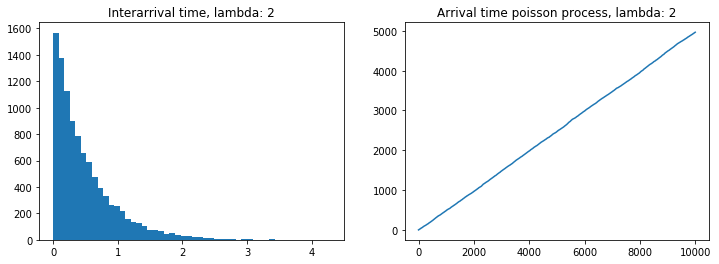

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].set_title(f'Interarrival time, lambda: {lamb}')
axes[0].hist(interarrival_times, bins=50)

axes[1].set_title(f'Arrival time poisson process, lambda: {lamb}')
axes[1].plot(np.cumsum(interarrival_times))

plt.show()

### Another way to generate a realization of a Poisson process in the interval (0,T):

- draw the total number of arrivals N from Poisson distribution $N \sim Poisson(\lambda T)$
- draw the location of each arrival instant $t_n$ in (0,T) from the uniform distribution $t_n \sim U(0,T)$
- the instants $t_1 , t_2 ,..., t_n$ (in order) constitute a realisation of the Poisson process

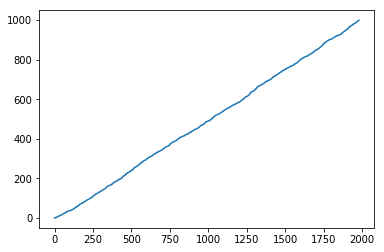

In [16]:
lamb = 2
t = 1000

N = np.random.poisson(lamb * t)

realise = sorted([t*np.random.rand() for _ in range(N)])

plt.plot(realise)

### Poisson processes (nonstationary Poisson process)

Poisson process for which the arrival rate is a function of time, $\lambda(t)$,

- Thinning method
- inverse transform

### thinning method

Idea: One generates arrivals with intensity upperbound: $\lambda* $ and a particular arrival at time $t^\prime$ is
accepted with probability $\lambda (t^\prime)/l$ *

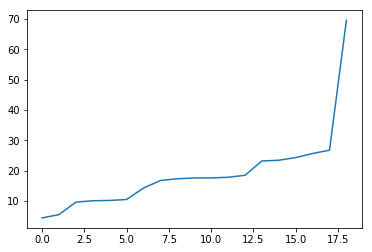

In [131]:
# let lambda t be sin(t/10)
T = 30
def lambda_function(t):
    return np.sin(t/10)

# upper bound of sin or cos function is 1

def generate_thin(t):
    u1, u2 = np.random.rand(2)
    t = t - np.log(u1)
    if u2 <= lambda_function(t):
        return t
    else:
        return generate_thin(t)
    
thin_values = []
t = 0
while t <= 10*np.pi:
    t = generate_thin(t)
    thin_values.append(t)
    
plt.plot(thin_values)

### Generation of arrivals from a nonstationary Poisson process (2)

# $\wedge(t) = \int_0^t \lambda (y) dy$

 $\wedge(t)$ denotes the average number of arrivals in the interval [0, t]
 
- Generate first arrival instants $\tau_n$ with Poisson intensity 1
- perform the transformation $t_n = \wedge^-1(\tau_n)$
 
1. generate $U_1 \sum U(0,1)$ <br>
2. set $\tau_{n+1} = \tau_n - ln(U_1)$ <br>
3. return $t_{n+1} = \wedge^-1(\tau_{n+1})$


 For example let:
 
 $\lambda (t) = sin(t/10)$
 
 $\wedge(t) = \int_0^t sin(\frac{y}{10})) dy, $ let $u = \frac{y}{10}, dy = 10 du$
 
 $\int_0^t sin(u)) 10du = 10[-cos(\frac{y}{10})]_{y=0}^{y=t} = 10[-cos(\frac{t}{10}) + 1]$
 
 $\wedge(t) = 10(1-cos (\frac{t}{10}))$

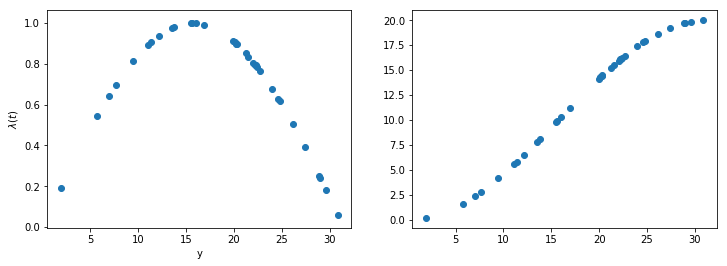

In [108]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

#t_interval = np.linspace(0, np.pi*10)
t_interval = [-np.log(np.random.rand()) for _ in range(100)]
t_interval = [el for el in np.cumsum(t_interval) if el <= 10*np.pi]

lambda_t = [np.sin(t/10)for t in t_interval]

axes[0].scatter(t_interval, lambda_t)
axes[0].set_xlabel("y")
axes[0].set_ylabel(r'$\lambda(t)$')

transform = [10 * (1 - np.cos(t/10)) for t in t_interval]
axes[1].scatter(t_interval, transform)

plt.show()